In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import guide_onde as go 
import Modele_modal_fct as mo

from IPython.display import Audio

In [2]:
### Paramètres fixés

c = 340
L = 60e-2

fe = 16000

In [ ]:
gamma = 0.42
zeta = 0.3

t_maxs = np.array([0.5, 1,1.5, 2,2.5, 3])

times_dirac = np.zeros(len(t_maxs))
times_triangle = np.zeros_like(times_dirac)

for i in range(len(t_maxs)) :
    deb = time.time()
    p, _ = go.simulation(t_max = t_maxs[i], fe = fe, gamma = gamma, zeta = zeta, type_reflection='dirac', L=L, c=c)
    end = time.time()
    times_dirac[i] = end - deb
    
    deb = time.time()
    p, _ = go.simulation(t_max = t_maxs[i], fe = fe, gamma = gamma, zeta = zeta, type_reflection='triangle', frac_T = 10, L=L, c=c)
    end = time.time()
    times_triangle[i] = end - deb

In [ ]:
plt.figure(figsize=(10,5))

plt.title(r"sample rate =" +str(fe) +r"Hz   $\gamma$ ="+str(gamma)+r"   $\zeta =$" + str(zeta))

plt.plot(t_maxs, times_dirac, 'ro',label="guide d'onde, réflexion dirac")
p = np.polyfit(t_maxs, times_dirac,deg=1)
plt.plot([0,t_maxs[-1]],[p[1],p[0]*t_maxs[-1]+p[1]],'r--')
theta = np.arctan(p[0])*180/np.pi
plt.text(x=1, y = p[0]+p[1]+0.02,rotation=theta,color='r',s="pente ="+str(np.round(p[0],2)))

plt.plot(t_maxs, times_triangle, 'bo',label="guide d'onde, réflexion triangle")
p = np.polyfit(t_maxs, times_triangle,deg=1)
plt.plot([0,t_maxs[-1]],[p[1],p[0]*t_maxs[-1]+p[1]],'b--')
theta = np.arctan(p[0])*180/np.pi
plt.text(x=1, y = p[0]+p[1]+0.02,rotation=theta,color='b',s="pente ="+str(np.round(p[0],2)))

plt.xlabel(r"Temps $t_{max}$ à simuler en s", size=14)
plt.ylabel(r"Durée de la simulation en s", size=14)
plt.legend(fontsize=14)
plt.grid()

plt.tight_layout()

#plt.savefig("figure/tps_guide_dureesim.pdf", transparent=True,bbox_inches = "tight")

In [ ]:
nb_modes = np.arange(start=1,stop=6,step=1)

gamma = 0.6
zeta = 0.2

t_max = 1

times = np.zeros(len(nb_modes))

for i in range(len(nb_modes)) :
    deb = time.time()
    p,_ = mo.simulation(dur=1,nb_mode=nb_modes[i], fs=16000, gamma=gamma, zeta=zeta, L=60e-2,c=340,rc=3e-2)
    end = time.time()
    times[i] = end - deb

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(nb_modes,times,'go')
plt.grid()

plt.xlabel("Nombre de modes",size=14)
plt.ylabel("Durée de calculs en s",size=14)

plt.title(r"$\gamma$ = "+str(gamma)+r"        $\zeta$ = "+str(zeta))

plt.tight_layout()

plt.savefig("figure/tps_nbmodes.pdf", transparent=True,bbox_inches = "tight")

In [ ]:
nb_modes = np.arange(start=1,stop=6,step=1)

gamma = 0.6
zeta = 0.2

t_max = 1

fig, ax = plt.subplots(2,3,figsize=(12,5),sharey=True,sharex=True)

for i in range(len(nb_modes)) :
    p,tps = mo.simulation(dur=1,nb_mode=nb_modes[i], fs=16000, gamma=gamma, zeta=zeta, L=60e-2,c=340,rc=3e-2)
    x1 = i//3
    x2 = i%3
    ax[x1,x2].plot(tps,p,'k',linewidth=1)
    ax[x1,x2].set_xlabel(r"Temps en s")
    ax[x1,x2].set_ylabel(r"Amplitude")
    ax[x1,x2].set_title(r"Nb de modes : "+str(nb_modes[i]))
    ax[x1,x2].set_xlim(0,0.2)
    
plt.tight_layout()
plt.savefig("figure/waveform_nbmodes.pdf", transparent=True,bbox_inches = "tight")

In [5]:
gamma = 0.6
zeta = 0.2

fe = 16000

t_maxs = np.array([0.5, 1,1.5, 2,2.5, 3])

times_dirac = np.zeros(len(t_maxs))
times_triangle = np.zeros_like(times_dirac)
times_1mode = np.zeros_like(times_dirac)
times_2mode = np.zeros_like(times_dirac)
times_3mode = np.zeros_like(times_dirac)

for i in range(len(t_maxs)) :
    deb = time.time()
    p, _ = go.simulation(t_max = t_maxs[i], sample_rate = fe, gamma = gamma, zeta = zeta, type_reflection='dirac', L=L, c=c)
    end = time.time()
    times_dirac[i] = end - deb
    
    deb = time.time()
    p, _ = go.simulation(t_max = t_maxs[i], sample_rate = fe, gamma = gamma, zeta = zeta, type_reflection='triangle', frac_T = 10, L=L, c=c)
    end = time.time()
    times_triangle[i] = end - deb
    
    deb = time.time()
    p,_ = mo.simulation(dur=t_maxs[i],nb_mode=1, fs=fe, gamma=gamma, zeta=zeta, L=L,c=c,rc=3e-2)
    end = time.time()
    times_1mode[i] = end - deb
    
    deb = time.time()
    p,_ = mo.simulation(dur=t_maxs[i],nb_mode=2, fs=fe, gamma=gamma, zeta=zeta, L=L,c=c,rc=3e-2)
    end = time.time()
    times_2mode[i] = end - deb
    
    deb = time.time()
    p,_ = mo.simulation(dur=t_maxs[i],nb_mode=3, fs=fe, gamma=gamma, zeta=zeta, L=L,c=c,rc=3e-2)
    end = time.time()
    times_3mode[i] = end - deb

/Users/a33689/Documents/Travail scolaire/M2 ATIAM/PAM/Auto-oscillations/modelisation_physique/guide_onde.py:66: RuntimeWarning: invalid value encountered in sqrt
  u = zeta * (1 - gamma + list_p) * np.nan_to_num(np.sqrt(gamma - list_p)) * valid


In [ ]:
plt.figure(figsize=(7,7))

plt.title(r"sample rate =" +str(fe) +r"Hz   $\gamma$ ="+str(gamma)+r"   $\zeta =$" + str(zeta))

plt.plot(t_maxs, times_dirac, 'o',color='teal',label="guide d'onde, réflexion dirac")
p = np.polyfit(t_maxs, times_dirac,deg=1)
plt.plot([0,t_maxs[-1]],[p[1],p[0]*t_maxs[-1]+p[1]],linestyle='--',color='teal')
theta = np.arctan(p[0])*180/np.pi
plt.text(x=1, y = p[0]+p[1]+0.035,rotation=theta,color='teal',s="pente ="+str(np.round(p[0],2)))

plt.plot(t_maxs, times_triangle, 'bo',label="guide d'onde, réflexion triangle")
p = np.polyfit(t_maxs, times_triangle,deg=1)
plt.plot([0,t_maxs[-1]],[p[1],p[0]*t_maxs[-1]+p[1]],'b--')
theta = np.arctan(p[0])*180/np.pi
plt.text(x=1, y = p[0]+p[1]+0.05,rotation=theta,color='b',s="pente ="+str(np.round(p[0],2)))

plt.plot(t_maxs, times_1mode, 'ro',label="modèle modal à 1 mode")
p = np.polyfit(t_maxs, times_1mode,deg=1)
plt.plot([0,t_maxs[-1]],[p[1],p[0]*t_maxs[-1]+p[1]],'r--')
theta = np.arctan(p[0])*180/np.pi
plt.text(x=2, y = p[0]*2+p[1]+0.1,rotation=theta,color='r',s="pente ="+str(np.round(p[0],2)))

plt.plot(t_maxs, times_2mode, 'o',color='goldenrod',label="modèle modal à 2 modes")
p = np.polyfit(t_maxs, times_2mode,deg=1)
plt.plot([0,t_maxs[-1]],[p[1],p[0]*t_maxs[-1]+p[1]],linestyle='--',color='goldenrod')
theta = np.arctan(p[0])*180/np.pi
plt.text(x=2.5, y = p[0]*2.5+p[1]+0.1,rotation=theta,color='goldenrod',s="pente ="+str(np.round(p[0],2)))

plt.plot(t_maxs, times_3mode, 'o',color='orange',label="modèle modal à 3 modes")
p = np.polyfit(t_maxs, times_3mode,deg=1)
plt.plot([0,t_maxs[-1]],[p[1],p[0]*t_maxs[-1]+p[1]],linestyle='--',color='orange')
theta = np.arctan(p[0])*180/np.pi
plt.text(x=1, y = p[0]+p[1]+0.15,rotation=theta,color='orange',s="pente ="+str(np.round(p[0],2)))

plt.xlabel(r"Temps $t_{max}$ à simuler en s", size=14)
plt.ylabel(r"Temps de calculs en s", size=14)
plt.legend(fontsize=14)
plt.grid()
plt.axis('equal')

plt.tight_layout()

plt.savefig("figure/tps_modale_guide.pdf", transparent=True,bbox_inches = "tight")

/Users/a33689/Documents/Travail scolaire/M2 ATIAM/PAM/Auto-oscillations/modelisation_physique/guide_onde.py:66: RuntimeWarning: invalid value encountered in sqrt
  u = zeta * (1 - gamma + list_p) * np.nan_to_num(np.sqrt(gamma - list_p)) * valid


Guide d'onde, réflexion dirac


Guide d'onde, réflexion triangle


Guide d'onde, réflexion gaussienne


Approche modale, 1 mode


Approche modale, 2 modes


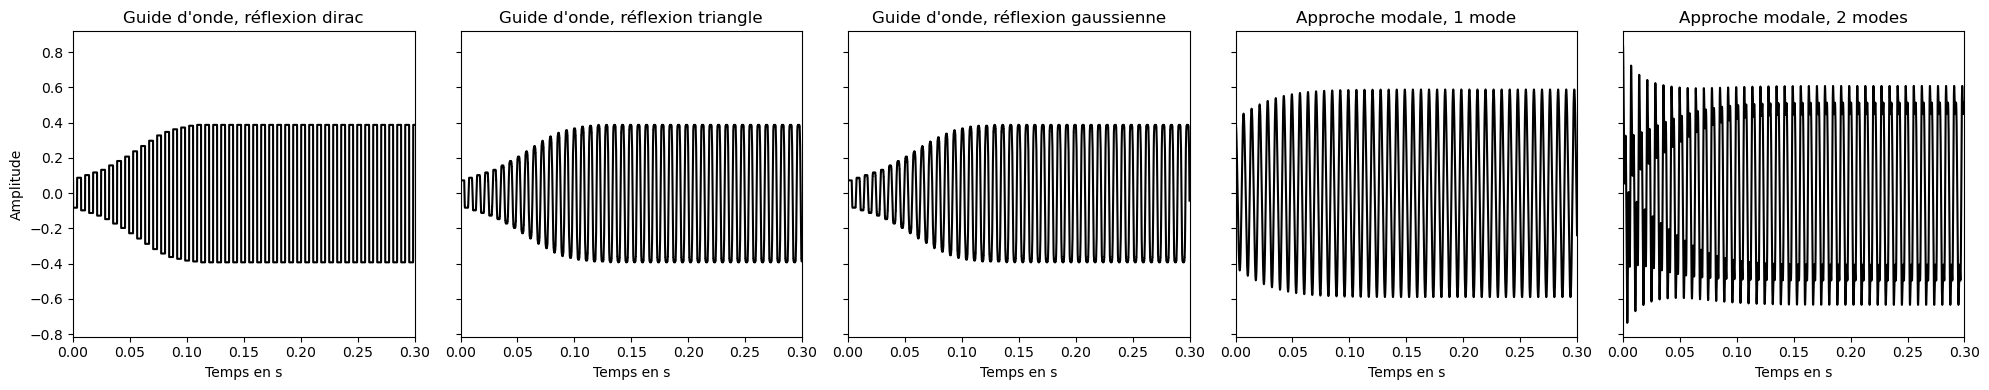

In [2]:
fig, ax = plt.subplots(1,5,figsize=(20,4),sharey=True)

gamma = 0.42
zeta = 0.2
t_max = 2
fe = 44100
tps = np.arange(int(t_max*fe))/fe


L = 60e-2
c = 340

i = 0

p,_ = go.simulation(t_max = t_max, sample_rate = fe, gamma = gamma, zeta = zeta, type_reflection='dirac', L=L, c=c,pertes_dirac=0.8)

print("Guide d'onde, réflexion dirac")
display(Audio(p,rate=fe))

ax[i].plot(tps,p,'k')
ax[i].set_xlabel('Temps en s')
ax[i].set_xlim(0,0.3)
ax[i].set_ylabel('Amplitude')
ax[i].set_title("Guide d'onde, réflexion dirac")

i+=1

p,_ = go.simulation(t_max=t_max, sample_rate=fe, gamma=gamma, zeta=zeta, type_reflection='triangle',frac_T=10, L=60e-2, c=340, fig=False)

print("Guide d'onde, réflexion triangle")
display(Audio(p,rate=fe))

ax[i].plot(tps,p,'k')
ax[i].set_xlabel('Temps en s')
ax[i].set_xlim(0,0.3)
#ax[i].set_ylabel('Amplitude')
ax[i].set_title("Guide d'onde, réflexion triangle")

i+=1

p,_ = go.simulation(t_max=t_max, sample_rate=fe, gamma=gamma, zeta=zeta, type_reflection='gauss',rate_gauss=0.05, L=60e-2, c=340, fig=False)

print("Guide d'onde, réflexion gaussienne")
display(Audio(p,rate=fe))

ax[i].plot(tps,p,'k')
ax[i].set_xlabel('Temps en s')
ax[i].set_xlim(0,0.3)
#ax[i].set_ylabel('Amplitude')
ax[i].set_title("Guide d'onde, réflexion gaussienne")


i+=1

p,_ = mo.simulation(dur=t_max,nb_mode=1, fs=fe, gamma=gamma, zeta=zeta, L=L,c=c,rc=0)

print("Approche modale, 1 mode")
display(Audio(p,rate=fe))

ax[i].plot(tps,p,'k')
ax[i].set_xlabel('Temps en s')
ax[i].set_xlim(0,0.3)
#ax[i].set_ylabel('Amplitude')
ax[i].set_title("Approche modale, 1 mode")


i += 1

p,_ = mo.simulation(dur=t_max,nb_mode=2, fs=fe, gamma=gamma, zeta=zeta, L=L,c=c,rc=0)

print("Approche modale, 2 modes")
display(Audio(p,rate=fe))

ax[i].plot(tps,p,'k')
ax[i].set_xlabel('Temps en s')
ax[i].set_xlim(0,0.3)
#ax[i].set_ylabel('Amplitude')
ax[i].set_title("Approche modale, 2 modes")


plt.tight_layout()

plt.savefig("figure/waveform_modale_guide.pdf", transparent=True,bbox_inches = "tight")